# Lab 05.1 - Crossvalidation 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
pd.set_option('display.max_columns', 500)

%matplotlib inline

# 1. Loading a data set a building a model

In [3]:
# Read in subset of footballer data
model_data = pd.read_csv('footballer_reduced.csv')
model_data

,age,height_cm,weight_kg,work_rate_att,overall
0,20,175,70,Medium,58
1,29,183,80,High,65
2,35,183,78,High,67
3,24,178,72,Medium,69
4,23,173,73,Medium,70
...,...,...,...,...,...
355,25,180,77,Medium,66
356,23,180,75,Medium,71
357,22,180,72,Medium,63
358,22,180,72,Medium,62


In [13]:
# Turn category into numeric variables
model_data = pd.get_dummies(model_data, drop_first=True)
model_data

,age,height_cm,weight_kg,overall,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium
0,20,175,70,58,0,0,1
1,29,183,80,65,1,0,0
2,35,183,78,67,1,0,0
3,24,178,72,69,0,0,1
4,23,173,73,70,0,0,1
...,...,...,...,...,...,...,...
355,25,180,77,66,0,0,1
356,23,180,75,71,0,0,1
357,22,180,72,63,0,0,1
358,22,180,72,62,0,0,1


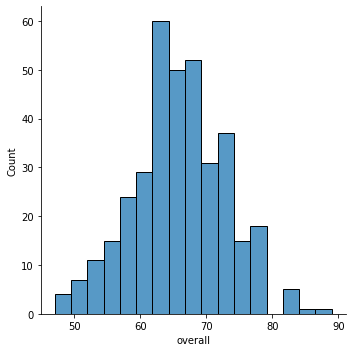

In [14]:
# Let's check out our prediction target, the 'overall' variable
sns.displot(model_data.overall)

In [17]:
# Define our X and y
y = model_data.overall
X = model_data.drop('overall', axis='columns')

## 2. Simple train-test split

In [18]:
# Split into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.20, random_state = 0)
print(Xtrain.shape, Xtest.shape)

(288, 6) (72, 6)


In [22]:
# Check training and test loss
def mse(y, ypred):
    return np.mean((y-ypred)**2)

linmodel = LinearRegression().fit(Xtrain, ytrain)
trainloss = mse(ytrain, linmodel.predict(Xtrain))
print(f"Training loss: {trainloss}")

testloss = mse(ytest, linmodel.predict(Xtest))
print(f"Testing loss: {testloss}")

Training loss: 33.23037858247384
Testing loss: 40.95224537555041


## 3. Crossvalidation: define the partitions
For more details, see: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [25]:
# Define Kfold crossvalidation 
from sklearn.model_selection import KFold
x=np.arange(20)
kf = KFold(n_splits=5)
for train, test in kf.split(x):
    print("%s %s" % (train, test))

[ 0  1  3  4  5  6  7  8  9 11 12 13 15 16 18 19] [ 2 10 14 17]
[ 0  1  2  5  6  7  8  9 10 11 12 14 15 16 17 19] [ 3  4 13 18]
[ 0  1  2  3  4  7  8 10 11 12 13 14 15 17 18 19] [ 5  6  9 16]
[ 1  2  3  4  5  6  9 10 12 13 14 15 16 17 18 19] [ 0  7  8 11]
[ 0  2  3  4  5  6  7  8  9 10 11 13 14 16 17 18] [ 1 12 15 19]


In [10]:
# Define Kfold crossvalidation with random shuffeling
from sklearn.model_selection import KFold
x=np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
for train, test in kf.split(x):
    print("%s %s" % (train, test))


In [27]:
# Leave one out crossvalidation
from sklearn.model_selection import LeaveOneOut
x=np.arange(20)
loo = LeaveOneOut()
for train, test in loo.split(x):
    print("%s %s" % (train, test))


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19] [14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 1

## 4. Run the crossvalidation

In [28]:
# Check CV loss
kf = KFold(n_splits=5, shuffle=False)
sc = make_scorer(mse)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring=sc)
print(cv_scores)
print(f"CV loss: {cv_scores.mean()}")

[24.02742989 35.5978666  35.92285439 46.5077554  36.25261759]
CV loss: 35.66170477264687
